<a href="https://colab.research.google.com/github/RSeth-Creator/Data/blob/dataScience/Binary_Classification_Bank_note_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
data_path="/content/gdrive/MyDrive/Semester_III/DeepLearning/pima-indians-diabetes.csv"
data = pd.read_csv(data_path,header=None)
data.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


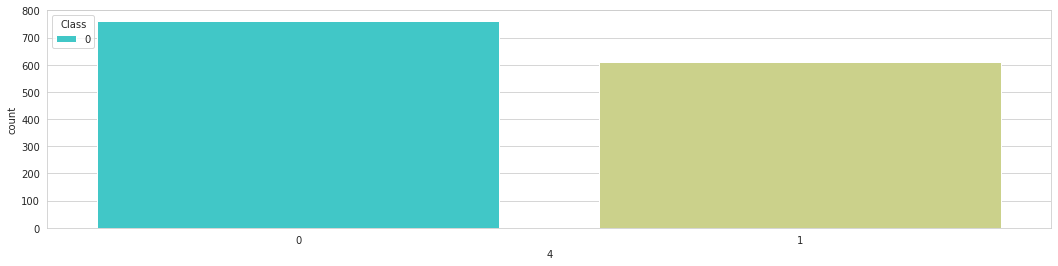

In [ ]:

sns.set_style('whitegrid')
plt.figure(figsize=(18, 4))
sns.countplot(x=4,data=data,palette='rainbow')
plt.legend(title='Class', loc='upper left', labels=['0', '1'])


In [ ]:
#Accuracy checking for models  
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB 
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
#Create a list with required model name 
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
    DecisionTreeClassifier(),
    KNeighborsClassifier(3)
]

features =  data.iloc[: , :3]
labels = data[[4]]
#Assing the level of cross validation to find the best accuracy
CV = 5  #cross validation number here it os 5 
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

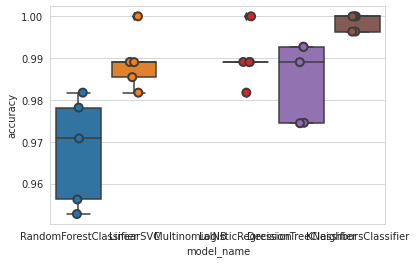

In [ ]:
#Showing which model giving the best accuracy
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [ ]:
#finding out the accuracy mean for all the classification model 
cv_df.groupby('model_name').accuracy.mean()

model_name
DecisionTreeClassifier    0.984695
KNeighborsClassifier      0.998543
LinearSVC                 0.989070
LogisticRegression        0.989797
MultinomialNB                  NaN
RandomForestClassifier    0.967934
Name: accuracy, dtype: float64

In [ ]:
#Applying KNN to the dataset as it has the highest accuracy
model_KNN = KNeighborsClassifier()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, data.index, test_size=0.33, random_state=0)
model_KNN.fit(X_train, y_train)
y_pred = model_KNN.predict(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


In [ ]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[248,   5],
       [  0, 200]])

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9889624724061811
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       253
           1       0.98      1.00      0.99       200

    accuracy                           0.99       453
   macro avg       0.99      0.99      0.99       453
weighted avg       0.99      0.99      0.99       453

